In [2]:
import sys

In [7]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\pbl_dbms_project\project_env\Scripts\python.exe -m pip install --upgrade pip


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 5.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.4 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 5.5 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 5.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.8 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\pbl_dbms_project\project_env\Scripts\python.exe -m pip install --upgrade pip


In [9]:
!{sys.executable} -m pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.4 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.7 MB 2.1 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.5 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.7 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 4.0 MB/s eta 0:00:01
   -------------------------------------


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\pbl_dbms_project\project_env\Scripts\python.exe -m pip install --upgrade pip


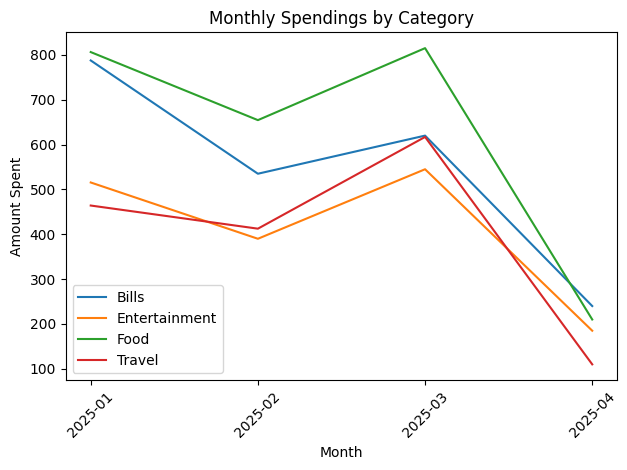

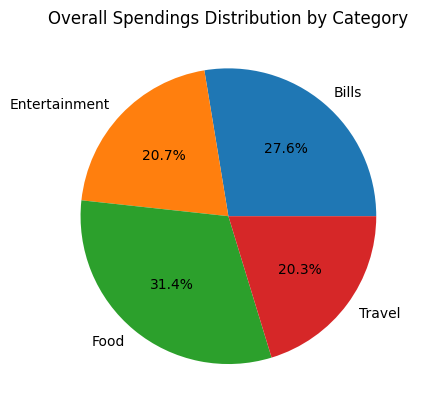

In [5]:
import mysql.connector
import matplotlib.pyplot as plt
from collections import defaultdict

def fetch_historic_data():
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Shubham@01',
        database='expense_tracker'
    )
    cursor = conn.cursor()
    # Query total monthly spendings by category over all available months
    cursor.execute("""
        SELECT DATE_FORMAT(date, '%Y-%m') as month,
               c.name as category,
               SUM(amount) as total_spent
        FROM transaction t
        JOIN category c ON t.categoryid = c.categoryid
        WHERE t.type = 'expense'
        GROUP BY month, category
        ORDER BY month ASC, category ASC
    """)
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    return rows

def process_data(rows):
    # Data structure: {month: {category: total_spent}}
    data = defaultdict(dict)
    months_set = set()
    categories_set = set()
    for month, category, total_spent in rows:
        data[month][category] = total_spent
        months_set.add(month)
        categories_set.add(category)
    months = sorted(months_set)
    categories = sorted(categories_set)
    return data, months, categories

def plot_monthly_spendings(data, months, categories):
    # Prepare a line plot for each category monthly spendings
    for category in categories:
        spendings = [data.get(month, {}).get(category, 0) for month in months]
        plt.plot(months, spendings, label=category)
    plt.title("Monthly Spendings by Category")
    plt.xlabel("Month")
    plt.ylabel("Amount Spent")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_category_spendings_overall(data, categories):
    overall_spendings = defaultdict(float)
    for month in data:
        for category in data[month]:
            overall_spendings[category] += float(data[month][category])
    labels = list(overall_spendings.keys())
    amounts = list(overall_spendings.values())
    plt.pie(amounts, labels=labels, autopct='%1.1f%%')
    plt.title("Overall Spendings Distribution by Category")
    plt.show()


# Main
rows = fetch_historic_data()
data, months, categories = process_data(rows)
plot_monthly_spendings(data, months, categories)
plot_category_spendings_overall(data, categories)


C:\Users\sj945\AppData\Local\Temp\ipykernel_20136\2673843864.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\pbl_dbms_project\project_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\pbl_dbms_project\project_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\pbl_dbms_project\project_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\pbl_dbms_project\project_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarni

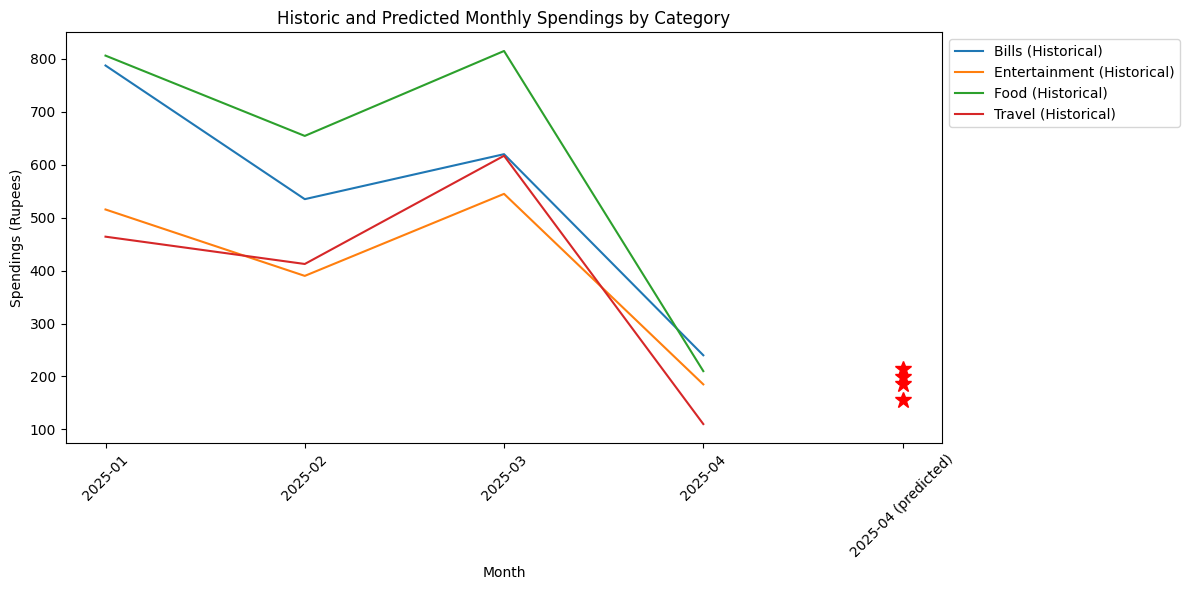

Savings Recommendations:
 - Consider reducing spending in discretionary category 'Bills': Predicted 156.23 rupees next month.
 - Consider reducing spending in discretionary category 'Entertainment': Predicted 199.75 rupees next month.
 - Spending in necessary or low predicted category 'Food': 214.38 rupees. No major cuts recommended.
 - Consider reducing spending in discretionary category 'Travel': Predicted 186.45 rupees next month.


In [12]:
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def fetch_data():
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Shubham@01',
        database='expense_tracker'
    )
    query = """
        SELECT DATE_FORMAT(t.date, '%Y-%m') as month,
               t.categoryid, 
               c.name as category_name,
               SUM(t.amount) as total_spent
        FROM transaction t
        JOIN category c ON t.categoryid = c.categoryid
        WHERE t.type = 'expense'
        GROUP BY month, t.categoryid, category_name
        ORDER BY month, category_name
    """
    df = pd.read_sql(query, conn)
    
    # Map necessity of categories (example: Food is necessary)
    category_necessity = {
        'Food': 'necessary',
        'Rent': 'necessary',
        'Utilities': 'necessary',
        'Entertainment': 'discretionary',
        'Travel': 'discretionary',
        'Shopping': 'discretionary',
        'Health': 'necessary',
        'Miscellaneous': 'discretionary'
    }
    df['necessity'] = df['category_name'].map(category_necessity).fillna('discretionary')
    conn.close()
    return df

def prepare_data(df):
    pivot = df.pivot(index='month', columns='category_name', values='total_spent').fillna(0)
    pivot['month_idx'] = np.arange(len(pivot))
    return pivot, df

def train_predict(pivot):
    model = LinearRegression()
    predictions = {}
    for category in pivot.columns[:-1]: # excluding month_idx
        X = pivot[['month_idx']]
        y = pivot[category]
        model.fit(X, y)
        next_month_idx = np.array([[pivot['month_idx'].max() + 1]])
        pred = model.predict(next_month_idx)[0]
        predictions[category] = pred
    return predictions

def plot_spendings(pivot, predictions):
    months = pivot.index.tolist()
    categories = list(pivot.columns[:-1])
    
    plt.figure(figsize=(12, 6))
    
    # Plot historical monthly spendings per category
    for cat in categories:
        plt.plot(months, pivot[cat], label=f'{cat} (Historical)')
        # Add predicted next month spending point as star
        plt.plot(months[-1] + " (predicted)", predictions[cat], 'r*', markersize=12)
    
    plt.xlabel('Month')
    plt.ylabel('Spendings (Rupees)')
    plt.title('Historic and Predicted Monthly Spendings by Category')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def recommend_savings(predictions, df, threshold=100):
    print("Savings Recommendations:")
    for category, amount in predictions.items():
        necessity = df[df['category_name'] == category]['necessity'].iloc[0]
        if necessity == 'discretionary' and amount > threshold:
            print(f" - Consider reducing spending in discretionary category '{category}': Predicted {amount:.2f} rupees next month.")
        else:
            print(f" - Spending in necessary or low predicted category '{category}': {amount:.2f} rupees. No major cuts recommended.")

# Run complete analysis
df = fetch_data()
pivot, df_with_necessity = prepare_data(df)
predictions = train_predict(pivot)
plot_spendings(pivot, predictions)
recommend_savings(predictions, df_with_necessity)
